
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [259]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
#Load data in dataframe
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
# Check unique values of 'Survived'
print(titanic_df['Survived'].unique())

[0 1]


In [262]:
# Get counts of all possible values in 'Survived', including missing values
titanic_df['Survived'].value_counts(dropna = False)

0    549
1    342
Name: Survived, dtype: int64

In [263]:
#Find the average age of those who survived and those who did not
print(titanic_df[titanic_df['Survived'] == 0]['Age'].mean())
print(titanic_df[titanic_df['Survived'] == 1]['Age'].mean())
# Seems like the younger ones survived, which makes sense as children are always evacuated first in emergencies

30.62617924528302
28.343689655172415



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [264]:
# 1. Create a bar chart showing how many missing values are in each column
# 2. Which column has the most NaN values? How many cells in that column are empty?
# Count number of missing values for each column
missing_values = titanic_df.isnull().sum()
missing_values
# Cabin has the most missing values. 687 of them are empty.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

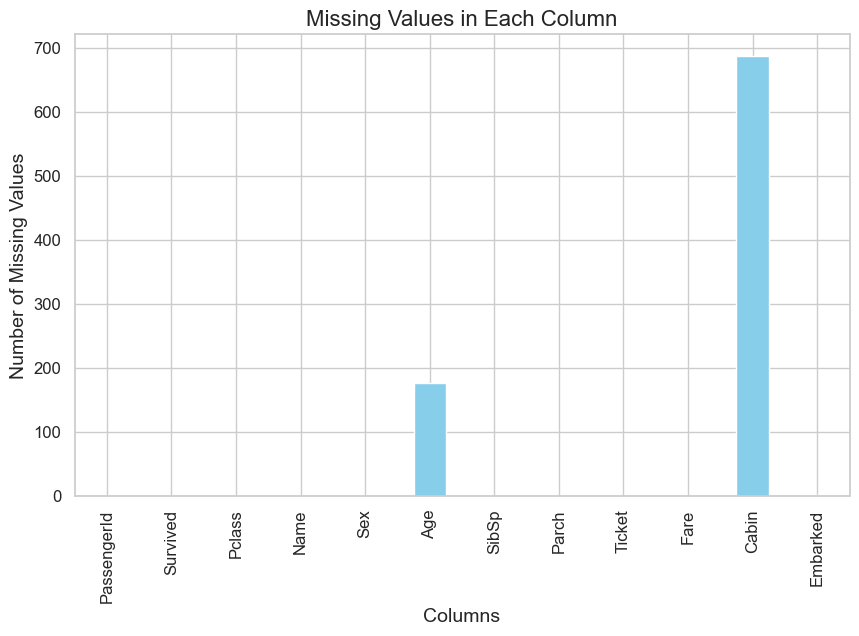

In [265]:
plt.figure(figsize = (10, 6))
missing_values.plot(kind = 'bar', color = 'skyblue', fontsize = 12)
plt.title('Missing Values in Each Column', fontsize = 16)
plt.xlabel('Columns', fontsize = 14)
plt.ylabel('Number of Missing Values', fontsize = 14)
plt.show()
# Check that the bar chart and the aggregated table are the same

In [266]:
# 3. Delete all rows where Embarked is empty
titanic_df.dropna(subset = ['Embarked'], inplace = True)
titanic_df['Embarked'].isnull().sum()

0

In [267]:
# 4. Fill all empty cabins with ¯\(ツ)/¯
print(titanic_df['Cabin'].isnull().sum())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(value = '¯\(ツ)/¯')
titanic_df['Cabin'].value_counts(dropna = False)

687


¯\(ツ)/¯        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [268]:
# 1. There are two columns that pertain to how many family members are on the boat for a given person. 
#    Create a new column called FamilyCount which will be the sum of those two columns.
titanic_df['FamilyCount'] = titanic_df['SibSp'] + titanic_df['Parch'] 
titanic_df[['FamilyCount', 'SibSp', 'Parch']].head(10)

,FamilyCount,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
5,0,0,0
6,0,0,0
7,4,3,1
8,2,0,2
9,1,1,0


In [269]:
#2. Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
titanic_df['IsReverend'] = titanic_df['Name'].str.contains('rev\.', case = False).astype(int)
titanic_df[titanic_df['IsReverend'] == 1][['Name', 'IsReverend']]

,Name,IsReverend
149,"Byles, Rev. Thomas Roussel Davids",1
150,"Bateman, Rev. Robert James",1
249,"Carter, Rev. Ernest Courtenay",1
626,"Kirkland, Rev. Charles Leonard",1
848,"Harper, Rev. John",1
886,"Montvila, Rev. Juozas",1


In [270]:
# 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
titanic_df_encoded = pd.get_dummies(titanic_df, columns = ['Embarked'], prefix = 'Embarked')
titanic_df_encoded = pd.concat([titanic_df['Embarked'], titanic_df_encoded], axis=1) # To keep the original column
titanic_df_encoded[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1


In [271]:
titanic_df_encoded2 = pd.get_dummies(titanic_df_encoded, columns = ['Sex'], prefix = 'Sex')
titanic_df_encoded2[['Sex_female', 'Sex_male']].head()
titanic_df_encoded2 = pd.concat([titanic_df_encoded['Sex'], titanic_df_encoded2], axis=1) # To keep the original column
titanic_df_encoded2[['Sex', 'Sex_female', 'Sex_male']].head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [272]:
#BONUS: Extract the title from everyone's name and create dummy columns
# Use regular expression to extract all letters that comes before . and after ,
titanic_df_encoded2['Salutation'] = titanic_df_encoded2['Name'].str.extract(r'([A-Za-z]+)\.')
titanic_df_encoded2['Salutation'].value_counts(dropna = False)

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Salutation, dtype: int64

In [273]:
titanic_df_encoded3 = pd.get_dummies(titanic_df_encoded2, columns = ['Salutation'], prefix = 'Salutation')
titanic_df_encoded3 = pd.concat([titanic_df_encoded2['Salutation'], titanic_df_encoded3], axis=1) # To keep the original column
titanic_df_encoded3.columns

Index(['Salutation', 'Sex', 'Embarked', 'PassengerId', 'Survived', 'Pclass',
       'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'FamilyCount', 'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'Salutation_Capt', 'Salutation_Col',
       'Salutation_Countess', 'Salutation_Don', 'Salutation_Dr',
       'Salutation_Jonkheer', 'Salutation_Lady', 'Salutation_Major',
       'Salutation_Master', 'Salutation_Miss', 'Salutation_Mlle',
       'Salutation_Mme', 'Salutation_Mr', 'Salutation_Mrs', 'Salutation_Ms',
       'Salutation_Rev', 'Salutation_Sir'],
      dtype='object')

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [274]:
#1. What was the survival rate overall?
titanic_df_encoded3['Survived'].mean()

0.38245219347581555

In [275]:
#2. Which gender fared the worst? What was their survival rate?
titanic_df_encoded3.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [276]:
# Alternatively, can use the dummy columns (as there are only 2 unique values for sex)
titanic_df_encoded3.groupby('Sex_male')['Survived'].mean()

Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [277]:
#3. What was the survival rate for each Pclass?
titanic_df_encoded3.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [278]:
#4. Did any reverends survive? How many?
titanic_df_encoded3[titanic_df_encoded3['IsReverend'] == 1][['Survived']].sum()

Survived    0
dtype: int64

In [279]:
titanic_df_encoded3[titanic_df_encoded3['IsReverend'] == 1][['Survived']].sum()
# Unfortunately, none survived...

Survived    0
dtype: int64

In [280]:
#5. What is the survival rate for cabins marked ¯\(ツ)/¯
titanic_df_encoded3[titanic_df_encoded3['Cabin'] == '¯\(ツ)/¯'][['Survived']].mean()

Survived    0.299854
dtype: float64

In [281]:
#6. What is the survival rate for people whose Age is empty?
titanic_df_encoded3[pd.isna(titanic_df_encoded3['Age']) == True][['Survived']].mean()

Survived    0.293785
dtype: float64

In [282]:
#7. What is the survival rate for each port of embarkation?
titanic_df_encoded3.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [283]:
#8. What is the survival rate for children (under 12) in each Pclass?
titanic_df_encoded3[titanic_df_encoded3['Age'] < 12].groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [284]:
#9. Did the captain of the ship survive? Is he on the list?
# Name of captain is Edward J. Smith
titanic_df_encoded3[(titanic_df_encoded3['Name'].str.contains('Edward', case = False) == True) & (titanic_df_encoded3['Name'].str.contains('Smith', case = False) == True)]
# Captain is not on the list

,Salutation,Sex,Embarked,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,...,Salutation_Major,Salutation_Master,Salutation_Miss,Salutation_Mlle,Salutation_Mme,Salutation_Mr,Salutation_Mrs,Salutation_Ms,Salutation_Rev,Salutation_Sir


In [285]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic_df_encoded3[['Name', 'Fare', 'Survived']][titanic_df_encoded3['Survived'] == 0].sort_values(by = 'Fare', ascending = False)
# Fortune, Mr. Charles Alexander and Fortune, Mr. Mark's ticket price is 263.

,Name,Fare,Survived
27,"Fortune, Mr. Charles Alexander",263.0000,0
438,"Fortune, Mr. Mark",263.0000,0
118,"Baxter, Mr. Quigg Edmond",247.5208,0
557,"Robbins, Mr. Victor",227.5250,0
527,"Farthing, Mr. John",221.7792,0
...,...,...,...
179,"Leonard, Mr. Lionel",0.0000,0
815,"Fry, Mr. Richard",0.0000,0
277,"Parkes, Mr. Francis ""Frank""",0.0000,0
466,"Campbell, Mr. William",0.0000,0


In [286]:
#11. Does having family on the boat help or hurt your chances of survival?
titanic_df_encoded3['FamilyInd'] = np.where(titanic_df_encoded3['FamilyCount'] > 0, 1, 0)
titanic_df_encoded3.groupby('FamilyInd')['Survived'].mean()
# Having a family increases chance of survival

FamilyInd
0    0.300935
1    0.505650
Name: Survived, dtype: float64

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


Text(0, 0.5, 'Survival Rate')

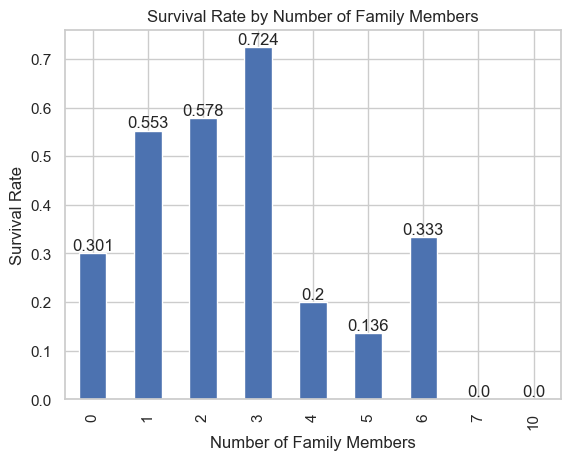

In [287]:
titanic_df_encoded3.groupby('FamilyCount').mean(numeric_only = True)[['Survived']].plot(kind = 'bar', legend = None)

# Show values for each bar and round them to 3sf
values = list(titanic_df_encoded3.groupby('FamilyCount')['Survived'].mean())
for i, value in enumerate(values):
    plt.text(i, value, round(value, 3), ha = 'center', va = 'bottom')
    
plt.title('Survival Rate by Number of Family Members')
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')

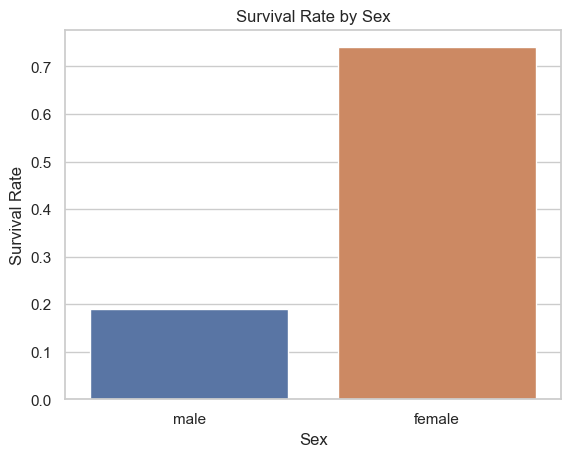

In [288]:
sns.set(style = "whitegrid")
ax = sns.barplot(x = titanic_df_encoded3['Sex'], y = titanic_df_encoded3['Survived'], errorbar= None)

plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

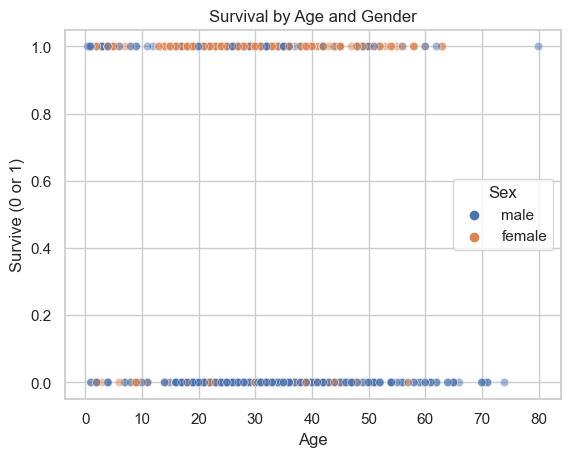

In [289]:
sns.scatterplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanic_df_encoded3, alpha = 0.5)
plt.title('Survival by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Survive (0 or 1)')
plt.legend(title = 'Sex')
plt.show()
# Interesting outlier. There is a 80 years old man who survived!!

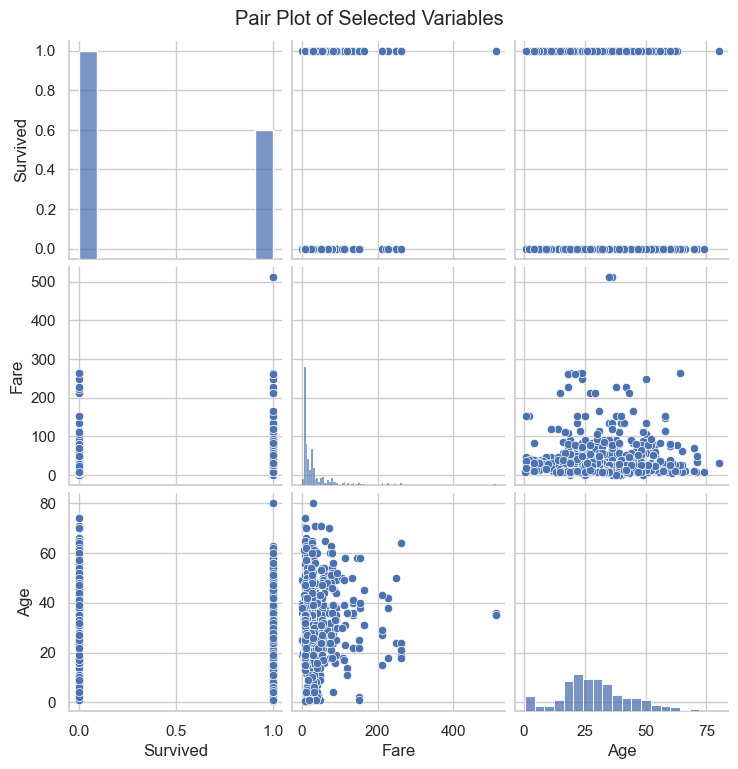

In [290]:
sns.pairplot(titanic_df_encoded3[['Survived', 'Fare', 'Age']])
plt.suptitle('Pair Plot of Selected Variables', y = 1.02)
plt.show()
# In previous question, the max fare of those who did not survive is 200+ only. Hence, the ones with 500+ fare should be those that survived.